<a href="https://colab.research.google.com/github/edwardo823/Hello-world/blob/master/FinaleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style= 'whitegrid')
import tensorflow as tf
import pandas as pd
import numpy as np
import keras 
import cv2
import glob as gb
import os 



In [36]:
train_folds = os.listdir("drive/My Drive/Colab Notebooks/HAC Dataset/train")
test_folds = os.listdir("drive/My Drive/Colab Notebooks/HAC Dataset/test")

# categories = []
# for files in train_path:  
#   if files == 'Object':
#     categories.append(1)
#   else:
#     categories.append(0)
# print(categories)

In [55]:
code = {'Object': 0, 'Car': 1}
def get_code(n):
  for x, y in code.items():
    if n == y:
      return x

In [51]:
#for looking the size of the images
size = []
for folder in train_folds:
  files = gb.glob(pathname = str("drive/My Drive/Colab Notebooks/HAC Dataset/train/"+folder+"/*.jpg"))
  for file in files:
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(100, 100, 3)      3213
(350, 350, 3)      1740
(1275, 1920, 3)       1
(1920, 2560, 3)       1
(1200, 1800, 3)       1
dtype: int64

In [56]:
#making the default size of all images
s = 100

In [65]:
x_train = []
y_train = []
for folder in train_folds:
  files = gb.glob(pathname = str("drive/My Drive/Colab Notebooks/HAC Dataset/train/"+folder+"/*.jpg"))
  for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (s,s))
    x_train.append(list(image_array))
    y_train.append(code[folder])

In [66]:
print(f"We Have {len(x_train)} In X_train")
print(f"We Have {len(y_train)} In y_train")
# print(x_train[0], y_train[0])

We Have 4956 In X_train
We Have 4956 In y_train


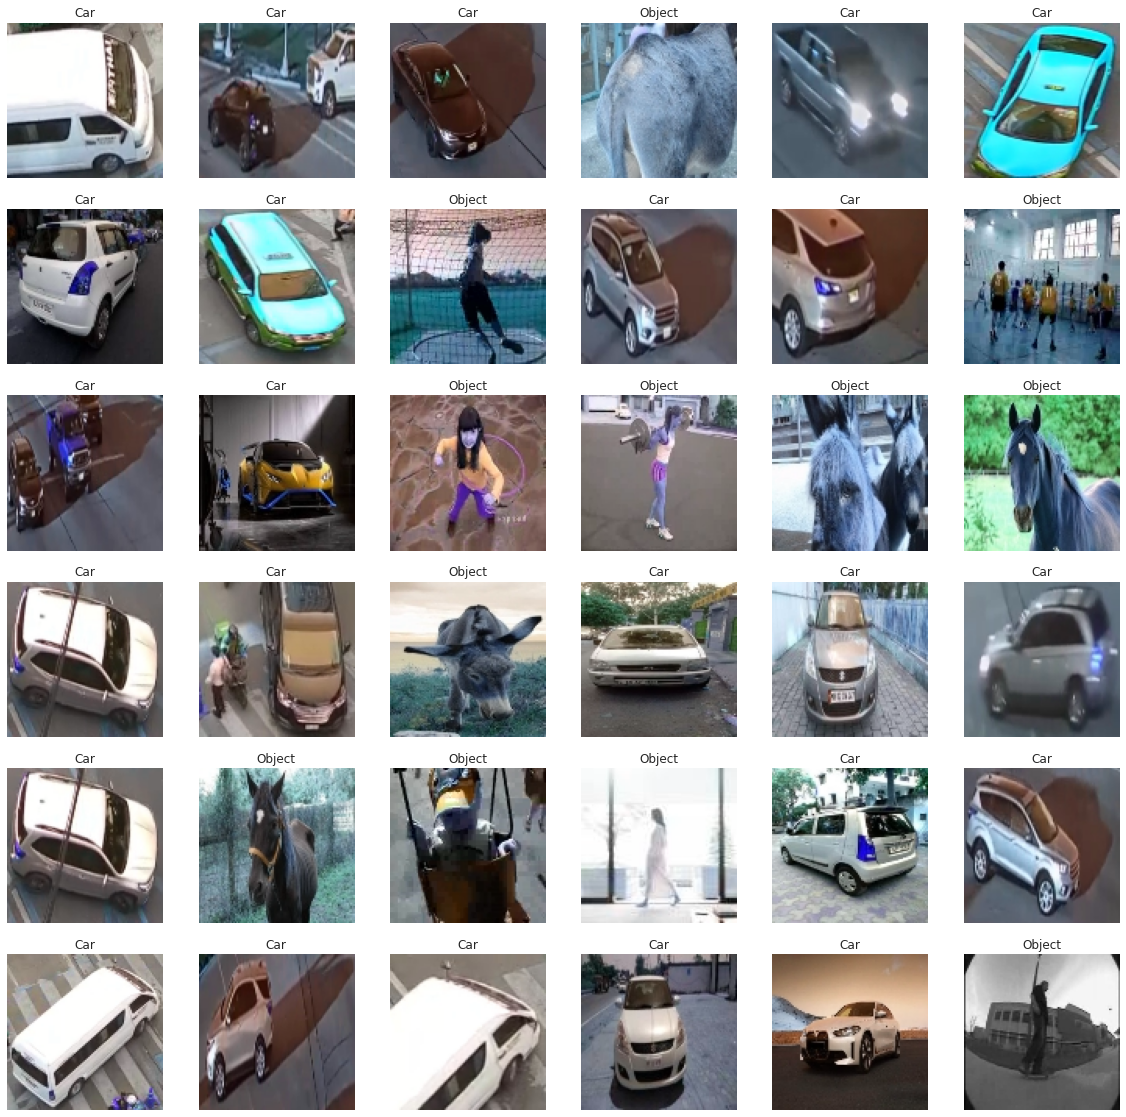

In [67]:
plt.figure(figsize = (20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_train), 36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(get_code(y_train[i]))

In [75]:
x_test = []
y_test = []

files = gb.glob(pathname = str("drive/My Drive/Colab Notebooks/HAC Dataset/test/*.jpg"))
for file in files:
  image = cv2.imread(file)
  image_array = cv2.resize(image, (s,s))
  x_test.append(list(image_array))
  # y_test.append(code[folder])

In [76]:
print(f"We Have {len(x_test)} In X_test")
print(f"We Have {len(y_test)} In y_test")
# print(x_train[0], y_train[0])

We Have 8 In X_test
We Have 0 In y_test
